### <span style="color:brown">Notebook Instructions</span>

- <i>  <span style="color:#FFFF00; background:#00C000"> <b> Please download the notebook available as downloads in the next unit. </b> It will not run in the browser.</i>
- <i>  Assuming, you have Anaconda or some Python environment installed on your system, <span style="color:#FFFF00; background:#00C000"> <b> you need to install Keras library. </b>. </i>
- <i> <span style="color:#00C000"> DNN models are very heavy and it is possible that your code will take time to run. Be patient and try again if required. Keep your CPU free of other burdens during the time of run! </i>

### <span style="color:brown">Notebook Objectives</span>

This notebook contains the code and explanation of a DNN model that predicts the trend of a stock. The prediction of the model is used to create a trading strategy and its returns are compared with market returns. 



### <span style="color:brown">Fetching the data</span>

In the cell below, we declare the required libraries. 

In [1]:
from nsepy import get_history # to fetch the data of the stock from NSE, India 
from datetime import date
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler  # library required for scaling the data
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In the cell below, the two variables that signify the start and end dates are signified. We will fetch the data falling within these dates. 

In [2]:
start = date(2015,1,1)
end= date.today()

We have used the nsepy library to fetch the data of the stock <font color='green'> State Bank of India </font>. The data is directly fetched from the exchange (NSE) website. 

In the cell below, the data is fetched using <i>get_history()(</i>). The closing prices of the data are plotted. 

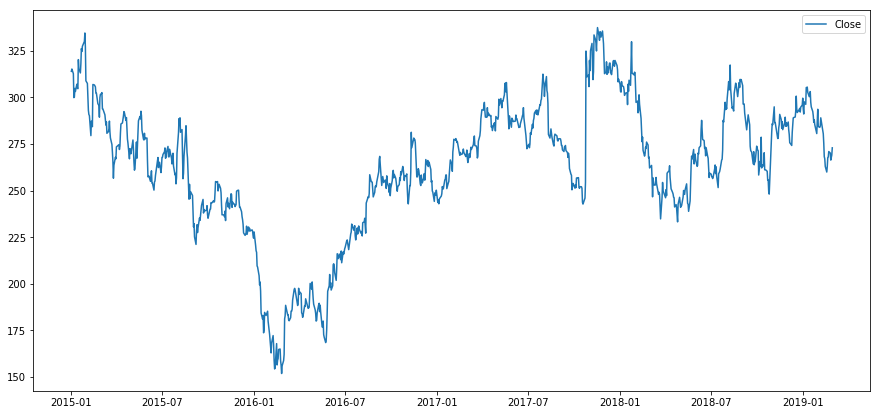

In [3]:
data = get_history(symbol="SBIN", start=start, end=end) #SBIN is symbol name for State Bank of India
plt.figure(figsize=(15,7))
plt.plot(data.Close)
plt.legend(['Close'])
plt.show()

In [4]:
data.head()

Symbol Series  Prev Close    Open    High     Low   Last   Close  \
Date                                                                          
2015-01-01   SBIN     EQ      311.85  312.45  315.00  310.70  314.0  314.00   
2015-01-02   SBIN     EQ      314.00  314.35  318.30  314.35  315.6  315.25   
2015-01-05   SBIN     EQ      315.25  316.25  316.80  312.10  312.8  312.75   
2015-01-06   SBIN     EQ      312.75  310.00  311.10  298.70  299.9  299.90   
2015-01-07   SBIN     EQ      299.90  300.00  302.55  295.15  301.4  300.15   

              VWAP    Volume      Turnover  Trades  Deliverable Volume  \
Date                                                                     
2015-01-01  313.67   6138488  1.925489e+14   58688             1877677   
2015-01-02  316.80   9935094  3.147389e+14   79553             4221685   
2015-01-05  313.84   9136716  2.867432e+14   88236             3845173   
2015-01-06  305.14  15329257  4.677601e+14  169268             7424847   
2015-01-07  299.95  15046745  4.513243e+14  147185             5631400   

            %Deliverble  
Date                     
2015-01-01       0.3059  
2015-01-02       0.4249  
2015-01-05       0.4208  
2015-01-06       0.4844  
2015-01-07       0.3743

### <span style="color:brown">Scaling the data</span>

Our input data or features consists of Open, Low, High & Close (OHLC) prices and Volume. The prices and the volume would be scaled in different fashions. 

The in-built function MinMaxScaler, available in sklearn, is used to scale the Volume column. It can't be used to scale the prices columns, because it scales each column individually and ignores the relationship between them. We want to retain the dependency between High >= Close >= Low, so will scale these columns without the function. 

#### <span style="color:#ac6600">Scaling the prices (OHLC)</span>

- Find the minimum and maximum values of all OHLC prices in the entire data set
- Scale up the OHLC columns accordingly so that the resultant values are between 0-1.

These two steps are carried in the next two cells. 

In [5]:
# Specify the test data size
test_size=100
# To avoid any look forward bias we will be taking only the train data to scale the data
max_=data.iloc[:-test_size][['Open','High','Low','Close']].max().max() #Using .max() once gives the maximum values of each column
min_=data.iloc[:-test_size][['Open','High','Low','Close']].min().min()
max_,min_

(351.3, 148.25)

In [6]:
X1=(data[['Open','High','Low','Close']]-min_)/(max_-min_)
X1=np.array(X1)

#### <span style="color:#ac6600">Scaling the volume</span>

The scaler function that we have used below is an in-built function in sklearn that exactly performs the same scaling technique that we used on the OHLC data. Here we have used this MinMaxScaler to scale the Volume column.

In [7]:
# Here we will instantiate a Minmaxscaler function 
# Then fit the Volume column data and transform it to the range of 0,1.
# Here we specify the shape of input as it is a single column, and sklearn expexcts you to explicyt 
# reshape when input data is a single column
scl=MinMaxScaler()
scl.fit(data[['Volume']].iloc[:-test_size].values.reshape(-1,1))
X2=scl.transform(data[['Volume']].values.reshape(-1,1))

Now, we will reassign the computed values back into the data and print it to see the changes

In [8]:
data=data.assign(Open=X1[:,0])
data=data.assign(High=X1[:,1])
data=data.assign(Low=X1[:,2])
data=data.assign(Close=X1[:,3])
data=data.assign(Volume=X2[:,0])
data.tail()

Symbol Series  Prev Close      Open      High       Low    Last  \
Date                                                                         
2019-02-25   SBIN     EQ      270.95  0.606008  0.606501  0.589264  270.15   
2019-02-26   SBIN     EQ      270.15  0.583846  0.590741  0.566363  266.15   
2019-02-27   SBIN     EQ      266.35  0.589756  0.612903  0.582615  267.60   
2019-02-28   SBIN     EQ      267.65  0.588279  0.603546  0.588033  269.15   
2019-03-01   SBIN     EQ      269.05  0.602315  0.622261  0.600098  272.85   

               Close    VWAP    Volume      Turnover  Trades  \
Date                                                           
2019-02-25  0.600345  269.49  0.071877  5.603778e+14  179172   
2019-02-26  0.581630  265.93  0.050698  4.061864e+14  113275   
2019-02-27  0.588033  269.18  0.071024  5.537483e+14  162785   
2019-02-28  0.594927  269.19  0.113481  8.516219e+14  140073   
2019-03-01  0.614134  272.87  0.068925  5.464233e+14  103387   

            Deliverable Volume  %Deliverble  
Date                                         
2019-02-25            11922113       0.5733  
2019-02-26             4945056       0.3238  
2019-02-27             7985846       0.3882  
2019-02-28            20159354       0.6372  
2019-03-01             9418388       0.4703

#### <span style="color:#ac6600">Check out the updated columns</span>

You can see that the OHLCV values have been updated in the table above and they are all within the range 0-1.

### <span style="color:brown">Creating feature and target datasets</span>

Now, we will create prediction data 'Y' and split test/training sets. 

The steps are: 

- Step 1: Create a feature data set (OHLCV) called <font color =red>X</font> which will be used to create the input for the DNN model
- Step 2: Create a dataset called <font color =red>y</font> that contains the future price trend
- Step 3: Split the dataset so that the last 100 rows are test data.


In [9]:
# Step 1: Creation of Dataset X
X=data[['Open','High','Low','Close','Volume']]

In [10]:
# Step 2: Creation of Dataset y
# Here we first create a column of ones that has the same length as the dataframe 'data'.
# Later we will store the target values in this column.
# We have given the target of predicting the weekly returns' trend to our strategy.
# So the target variable will attempt to predict if the close price has increased or decreased after 5 trading days.
y=np.ones(len(data.Close))
y=np.where(data.Close.shift(-5)>data.Close,1,0) # If the returns are higher, then 'y' is 1, else '0'.

In [11]:
# Step 3: Creation of 4 Datasets
X_train=np.array(X.iloc[:-test_size])
y_train=np.array(y[:-test_size])
X_test=np.array(X.iloc[-test_size:])
y_test=np.array(y[-test_size:])

Note that the value of 'y' is only 0 or 1. These are called 'Classes' or categories. If one class is more than the other class then the model will end up learning more instances of one, and may predict only that class correctly. To counter this, we will set weights to both the classes which will enforce the model to give different learning weightage to different classes, making the net weight of all classes equal.

### <span style="color:brown">Set Class Weights</span>

The steps are:
- Calculate the number of instances of each class (#s of '0's and '1's)
- Calculate the percentage distribution of each class in the train data (% of '0's and '1's)
- Allocate the percentage distribution of class 0 to class 1 and vice versa (this is explained in a previous video)

This allows the model to pick data of both the classes or cases, when the output(y) is '0' or '1', with equal probabilitiy. Hence, the model should learn well. 

In [12]:
class_1=y_train.sum()
class_0=len(y_train)-class_1

class_1,class_0

(457, 476)

Here we will calcualte the percentage of each of the classes in the train dataset.
Once this is done, we allocate the percentage allocation of Class 0 to be equal to the percentage of Class 1 labels in the train data.
The purpose of doing this is to give equal importance to both the classes. 

In [13]:
class_0_percentage=class_0/len(y_train)
class_1_percentage=class_1/len(y_train)

class_0_weight=class_1_percentage
class_1_weight=class_0_percentage

# We will create a dictionary called class_weight to allocate the corresponding weghts to each of the labels.
class_weight={0:class_0_weight,1:class_1_weight}

And that concludes data pre-processing steps.

### <span style="color:brown">Creating the DNN model</span>

We have three code cells here, which 

- Import the libraries
- Define the hyper parameters 
- Create the model sequentially, layer by layer


#### Please change the below cell to a code type to run it

In [14]:
# Libraries
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Dense, Activation
from keras.callbacks import ModelCheckpoint
from keras.layers import BatchNormalization #not used

Using TensorFlow backend.


In [1]:
# Parameters - please tweak them in later runs
dropout_ratio=0.23
momentum=0.99 #helps prevent getting stuck in a local minimum
np.random.seed(42)
neurons=100
act_1='tanh'
act_2='softmax' #used for 2 or more classes, in combination with loss: 'categorical_crossentropy'
act_3='sigmoid' #used for 2 or more classes, in combination with loss: 'categorical_crossentropy'

NameError: name 'np' is not defined

Before we create the model, let us understand the code for the first layer 

*model.add(Dense(neurons, use_bias=True, kernel_initializer='he_normal',bias_initializer='zeros',input_shape=X_train.shape[1:]))*

- Dense: to define a dense layer
- neurons: to define the number of neurons (this keeps on increasing in every layer)
- use_bias=True: it keeps the bias term in the equation
- kernel_initializer='he_normal': at the first run, use weights from He-normal distribution
- bias_initializer='zeros': at the first run, use bias as '0'
- input_shape=X_train.shape[1:])): to define the number of columns or features that go as input in the first run

It is not difficult to understand the code for other layers now! 


#### Please change the below cell to a code type to run it

In [16]:
# The DNN Model

model=Sequential() #We want the layers to work sequentially, one after other.

# Layer 1
model.add(Dense(neurons, use_bias=True, kernel_initializer='he_normal',bias_initializer='zeros',input_shape=X_train.shape[1:]))
#model.add(BatchNormalization())
model.add(Activation(act_1))
model.add(Dropout(dropout_ratio))

# Layer 2
model.add(Dense(neurons*2, use_bias=True, kernel_initializer='he_normal'
               , bias_initializer='zeros'))
#model.add(BatchNormalization())
model.add(Activation(act_1))
model.add(Dropout(dropout_ratio))

# Layer 3
model.add(Dense(neurons*3, use_bias=True, kernel_initializer='he_normal'
               , bias_initializer='zeros'))
#model.add(BatchNormalization())
model.add(Activation(act_1))
model.add(Dropout(dropout_ratio))

# Layer 4
model.add(Dense(neurons*4, use_bias=True, kernel_initializer='he_normal'
              , bias_initializer='zeros'))
#model.add(BatchNormalization())
model.add(Activation(act_1))
model.add(Dropout(dropout_ratio))

# Layer 5
model.add(Dense(neurons*5, use_bias=True, kernel_initializer='he_normal'
              , bias_initializer='zeros'))
#model.add(BatchNormalization())
model.add(Activation(act_1))
model.add(Dropout(dropout_ratio))

model.add(Dense(1,activation=act_3)) # Layer 6

model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

### <span style="color:brown">Define and save the monitoring parameter</span>

In Keras, we can save the best weights of the model by creating a checkpoint during the training of the model. To create a checkpoint, we specify the metric that needs to be monitored and saved accordingly.  

<span style="color:#ac6600">Validation set loss</span> is passed as the monitoring parameter. The mode of saving is specified as 'auto'. This means that the model will save the weights of the network whenever a low value for the validation loss is generated. 

The file path is weights-best2.hdf5 to save the weights of the model.

The verbose=1 parameter defines how much information about every batch training needs to be printed.

#### Please change the below cell to a code type to run it

In [17]:
filepath="weights-best2.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 175)               1050      
_________________________________________________________________
activation_1 (Activation)    (None, 175)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 175)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 350)               61600     
_________________________________________________________________
activation_2 (Activation)    (None, 350)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 350)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 525)               184275    
__________

### <span style="color:brown">Training the model</span>


Now, its time to train the model.

The callback feature in the code below saves the best weights. 

#### Please change the below cell to a code type to run it

In [19]:
training=model.fit(X_train, y_train, epochs=150, batch_size=256, verbose=1, validation_split=0.2,
                   callbacks=[checkpoint],class_weight=class_weight)

Train on 746 samples, validate on 187 samples
Epoch 1/150
746/746 [==============================] - 3s 4ms/step - loss: 0.8961 - acc: 0.4973 - val_loss: 1.5232 - val_acc: 0.4599

Epoch 00001: val_loss improved from inf to 1.52318, saving model to weights-best2.hdf5
Epoch 2/150
746/746 [==============================] - 1s 1ms/step - loss: 0.6947 - acc: 0.5027 - val_loss: 0.8527 - val_acc: 0.5401

Epoch 00002: val_loss improved from 1.52318 to 0.85273, saving model to weights-best2.hdf5
Epoch 3/150
746/746 [==============================] - 1s 1ms/step - loss: 0.5298 - acc: 0.5013 - val_loss: 0.4535 - val_acc: 0.4599

Epoch 00003: val_loss improved from 0.85273 to 0.45354, saving model to weights-best2.hdf5
Epoch 4/150
746/746 [==============================] - 1s 1ms/step - loss: 0.4481 - acc: 0.4799 - val_loss: 0.3752 - val_acc: 0.4599

Epoch 00004: val_loss improved from 0.45354 to 0.37522, saving model to weights-best2.hdf5
Epoch 5/150
746/746 [==============================] - 1s 


Epoch 00043: val_loss did not improve from 0.33706
Epoch 44/150
746/746 [==============================] - 1s 992us/step - loss: 0.3626 - acc: 0.5027 - val_loss: 0.3407 - val_acc: 0.6096

Epoch 00044: val_loss did not improve from 0.33706
Epoch 45/150
746/746 [==============================] - 1s 976us/step - loss: 0.3697 - acc: 0.5201 - val_loss: 0.3845 - val_acc: 0.4599

Epoch 00045: val_loss did not improve from 0.33706
Epoch 46/150
746/746 [==============================] - 1s 1ms/step - loss: 0.3713 - acc: 0.5040 - val_loss: 0.3427 - val_acc: 0.5401

Epoch 00046: val_loss did not improve from 0.33706
Epoch 47/150
746/746 [==============================] - 1s 1ms/step - loss: 0.3578 - acc: 0.5375 - val_loss: 0.3618 - val_acc: 0.4599

Epoch 00047: val_loss did not improve from 0.33706
Epoch 48/150
746/746 [==============================] - 1s 918us/step - loss: 0.3662 - acc: 0.5335 - val_loss: 0.3583 - val_acc: 0.5401

Epoch 00048: val_loss did not improve from 0.33706
Epoch 49/150


Epoch 00087: val_loss did not improve from 0.33706
Epoch 88/150
746/746 [==============================] - 1s 1ms/step - loss: 0.3550 - acc: 0.5188 - val_loss: 0.3442 - val_acc: 0.5401

Epoch 00088: val_loss did not improve from 0.33706
Epoch 89/150
746/746 [==============================] - 1s 1ms/step - loss: 0.3525 - acc: 0.5282 - val_loss: 0.3486 - val_acc: 0.4599

Epoch 00089: val_loss did not improve from 0.33706
Epoch 90/150
746/746 [==============================] - 1s 1ms/step - loss: 0.3642 - acc: 0.5214 - val_loss: 0.3398 - val_acc: 0.5508

Epoch 00090: val_loss did not improve from 0.33706
Epoch 91/150
746/746 [==============================] - 1s 1ms/step - loss: 0.3538 - acc: 0.5188 - val_loss: 0.3405 - val_acc: 0.5775

Epoch 00091: val_loss did not improve from 0.33706
Epoch 92/150
746/746 [==============================] - 1s 1ms/step - loss: 0.3615 - acc: 0.5147 - val_loss: 0.3390 - val_acc: 0.5936

Epoch 00092: val_loss did not improve from 0.33706
Epoch 93/150
746/7


Epoch 00131: val_loss did not improve from 0.33706
Epoch 132/150
746/746 [==============================] - 1s 1ms/step - loss: 0.3462 - acc: 0.5375 - val_loss: 0.3409 - val_acc: 0.5455

Epoch 00132: val_loss did not improve from 0.33706
Epoch 133/150
746/746 [==============================] - 1s 926us/step - loss: 0.3534 - acc: 0.5442 - val_loss: 0.3403 - val_acc: 0.5882

Epoch 00133: val_loss did not improve from 0.33706
Epoch 134/150
746/746 [==============================] - 1s 999us/step - loss: 0.3506 - acc: 0.5228 - val_loss: 0.3412 - val_acc: 0.5508

Epoch 00134: val_loss did not improve from 0.33706
Epoch 135/150
746/746 [==============================] - 1s 942us/step - loss: 0.3518 - acc: 0.5349 - val_loss: 0.3473 - val_acc: 0.4599

Epoch 00135: val_loss did not improve from 0.33706
Epoch 136/150
746/746 [==============================] - 1s 1ms/step - loss: 0.3590 - acc: 0.5174 - val_loss: 0.3425 - val_acc: 0.5187

Epoch 00136: val_loss did not improve from 0.33706
Epoch 1

 These best weights are loaded into the model using the load_weights function.

model.load_weights("weights-best2.hdf5")

Let us see what features are avaialble for a fit object. Here we can see that there are four values that we can access:

- val_acc 
- val_loss 
- loss - we use this 
- acc

Let us plot the loss values to see how the training and validation losses have converged.

If you change the parameters and train the model again for a different data set, then try to check this plot. It will help you in understanding if the model is overfitting or underfitting the train data. 

In [20]:
training.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

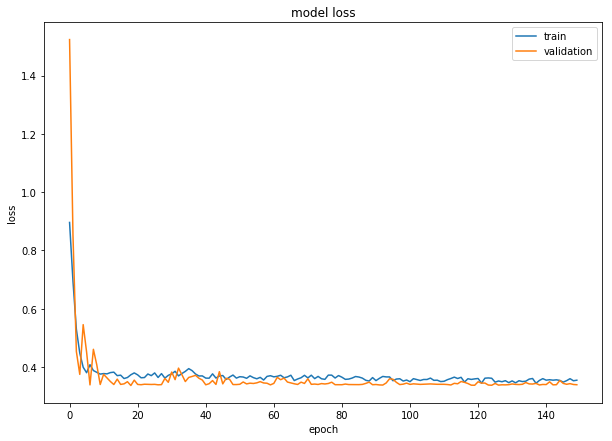

In [21]:
# summarize history for loss
plt.figure(figsize=(10,7))
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best')
plt.show()

## Predicting the Trend

Now, we will create a list called predict_close that would hold the DNN model's predictions on the test data.

The output of the keras predict function is a probability value, where a probability of more than 0.5 means that the data belongs to class 1 and a probability of less than or equal to 0.5 means that the data belongs to class 0.

Based on these probability values, we will seperate the Buy and Sell signals for the strategy, by assuming a buy signal of +1 when the output probability is more than 0.5 and a sell signal of -1 otherwise.

In [22]:
predict_trend=np.ones(len(X_test))
for i in range(X_test.shape[0]):    
    predict_trend[i]=np.where(model.predict(np.expand_dims(X_test[i],axis=0))[0][0]>0.5,1,-1)
predict_trend=np.reshape(predict_trend,(1,-1)).tolist()[0]
y_test=np.where(y_test==0,-1,1)
from sklearn.metrics import accuracy_score

acc= accuracy_score(list(y_test),list(predict_trend))

### The results might vary due to the Dropout layer and the changes in data if any

In [23]:
print("The Accuracy of the model on the test set is:",acc*100,'%')
print("\n\n\nThe Signals Predicted\n",list(predict_trend))

The Accuracy of the model on the test set is: 55.00000000000001 %



The Signals Predicted
 [-1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0]


## Visualizing and comparing the performance

Now, let us plot the performance of the model on the test data by multiplying the buy and sell signals with the corresponding future returns.

Once we calculate the percentage returns of the model, we will take a cumulative sum of all these returns on the test data to measure the overall performance of the model.


We have also plotted the cumulative markets returns to compare how a simple Buy and Hold strategy would have performed in comparison to our model.

The annualized interest rate in India is currently 6%. So, for the 100-day period in the test data, the interest rate would be adjusted.

In [24]:
market_returns=pd.Series(data.Last.shift(-1).iloc[-test_size:].pct_change().values)
strategy_returns=pd.Series(predict_trend*market_returns)
intrest_rate=0.06/3

In [25]:
Sharpe=(np.nansum(strategy_returns)-intrest_rate)/strategy_returns.std()

### The results might vary due to the Dropout layer and the changes in data if any

In [26]:
Sharpe

4.123918175034551

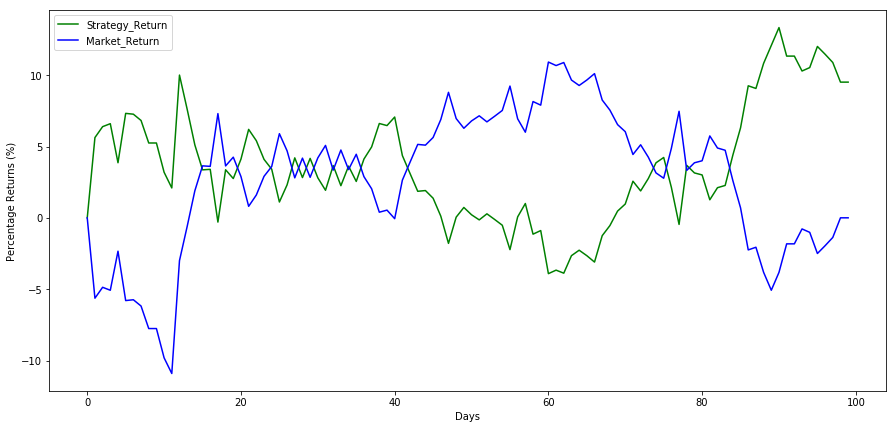

In [27]:
plt.figure(figsize=(15,7))
plt.plot(np.nancumsum(strategy_returns)*100,c='g')
plt.plot(np.nancumsum(market_returns)*100,c='b')
plt.ylabel('Percentage Returns (%)')
plt.xlabel('Days')
plt.legend(['Strategy_Return','Market_Return'])
plt.show()


In [28]:
final_return=np.nancumsum(strategy_returns)*100

### Saving the model for later usage

##### Once you have created a model that you want to save, you can save the model in a json format and use it later.

In [29]:
# Serialize the model to JSON
# to_json() is an inbuilt function of Keras models
model_json = model.to_json()
# Write this model to a ".json" file
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# Serialize the weights of neurons to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


##### Whenever you want to load this saved model, you can use the model_from_json function from keras with the following code

In [30]:
# Use the model_from_json function to load the previously saved model 
from keras.models import model_from_json
# Load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# Load weights of neurons for the model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


### Conculsion

In the past 100 days, the model has returned (%)

In [31]:
final_return[-1]

9.509702897842242

####  Please note: We have given a simple classifier model that could be used for paper trading. This is just a toy example, and not meant for real trading. To build a more robust classification model, we need to perform thorough satistical analysis on multiple data sets and time frames.